In [1]:
import pandas as pd
import numpy as np

In [3]:
test_data = pd.read_excel("test_data.xlsx")
train_data = pd.read_excel("train_data.xlsx")

In [4]:
test_data.head()

,Month,Latitude,Longitude,air_temperature,relative_humidity,daily_solar_radiation_horizontal,atmospheric_pressure,earth_temperature,Mean monthly wind speed,Elevation
0,January,14.967,77.317,24.0,0.527,5.26,95.5,27.9,3.3,514
1,February,14.967,77.317,27.0,0.411,6.11,95.3,32.2,3.7,514
2,March,14.967,77.317,30.1,0.358,6.54,95.2,36.0,3.7,514
3,April,14.967,77.317,30.0,0.487,6.55,95.0,35.3,4.6,514
4,May,14.967,77.317,29.1,0.559,6.20,94.8,32.7,5.4,514


In [5]:
train_data.head()

,Month,Latitude,Longitude,air_temperature,relative_humidity,daily_solar_radiation_horizontal,atmospheric_pressure,earth_temperature,Mean monthly wind speed,Elevation
0,January,16.738,78.008,23.9,0.540,5.06,97.2,27.1,2.7,366
1,February,16.738,78.008,26.5,0.459,5.79,97.0,31.1,3.8,366
2,March,16.738,78.008,29.7,0.402,6.34,96.8,35.4,2.9,366
3,April,16.738,78.008,29.9,0.518,6.48,96.6,34.7,3.9,366
4,May,16.738,78.008,31.1,0.501,6.13,96.3,35.0,4.9,366


In [6]:
train_data["wind_speed"] = train_data["Mean monthly wind speed"]
test_data["wind_speed"] = test_data["Mean monthly wind speed"]

In [7]:
month_to_int = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

In [8]:
train_data['Month'] = train_data['Month'].map(month_to_int)

In [9]:
test_data['Month'] = test_data['Month'].map(month_to_int)

In [10]:
y_train = train_data["wind_speed"]
y_test = test_data["wind_speed"]

In [11]:
X_train = train_data.drop(["Mean monthly wind speed","wind_speed"],axis=1)
X_train.head()

,Month,Latitude,Longitude,air_temperature,relative_humidity,daily_solar_radiation_horizontal,atmospheric_pressure,earth_temperature,Elevation
0,1,16.738,78.008,23.9,0.540,5.06,97.2,27.1,366
1,2,16.738,78.008,26.5,0.459,5.79,97.0,31.1,366
2,3,16.738,78.008,29.7,0.402,6.34,96.8,35.4,366
3,4,16.738,78.008,29.9,0.518,6.48,96.6,34.7,366
4,5,16.738,78.008,31.1,0.501,6.13,96.3,35.0,366


In [12]:
X_test = test_data.drop(['wind_speed',"Mean monthly wind speed"], axis=1)
X_test.head()

,Month,Latitude,Longitude,air_temperature,relative_humidity,daily_solar_radiation_horizontal,atmospheric_pressure,earth_temperature,Elevation
0,1,14.967,77.317,24.0,0.527,5.26,95.5,27.9,514
1,2,14.967,77.317,27.0,0.411,6.11,95.3,32.2,514
2,3,14.967,77.317,30.1,0.358,6.54,95.2,36.0,514
3,4,14.967,77.317,30.0,0.487,6.55,95.0,35.3,514
4,5,14.967,77.317,29.1,0.559,6.20,94.8,32.7,514


In [13]:
y_train.tail()

412    7.3
413    7.9
414    3.1
415    2.1
416    1.2
Name: wind_speed, dtype: float64

In [15]:
train_data = train_data.drop(["Mean monthly wind speed"],axis=1)

In [16]:
import matplotlib.pyplot as plt
correlation = train_data.corr()["wind_speed"].drop("wind_speed")

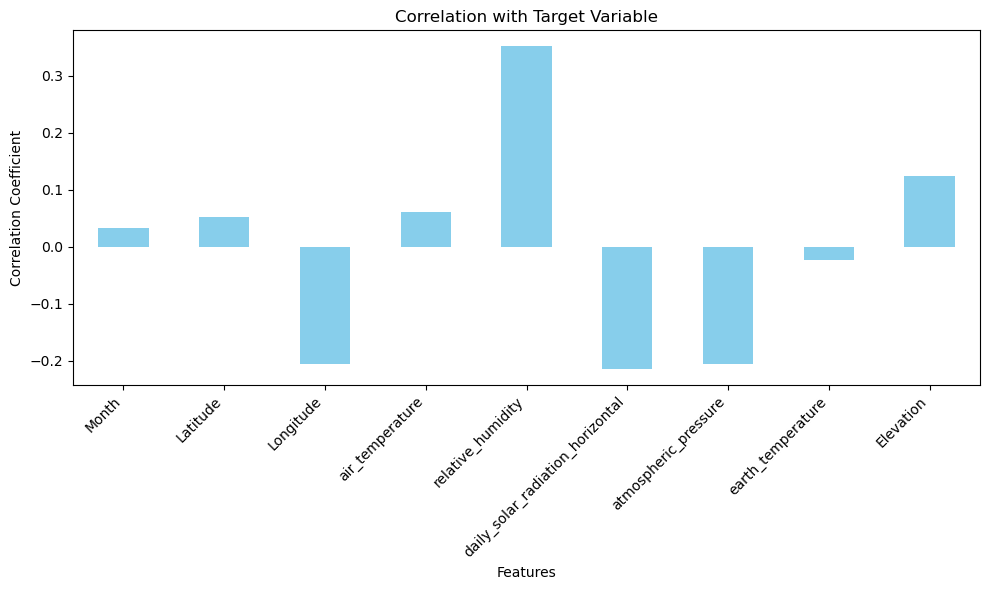

In [17]:
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

mae_value = metrics.mean_absolute_error(y_test, dtr_pred)
mse_value = metrics.mean_squared_error(y_test, dtr_pred)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, dtr_pred))
r2_score_value = r2_score(y_test, dtr_pred)

print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print("R2 score:", r2_score(y_test, dtr_pred))

MAE: 0.9645833333333332
MSE: 1.650625
RMSE: 1.2847665157529597
R2 score: 0.15201380666653286


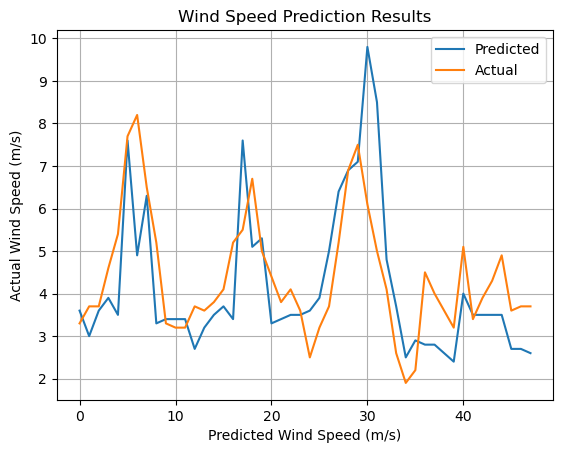

In [19]:
plt.plot(dtr_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Predicted Wind Speed (m/s)')
plt.ylabel('Actual Wind Speed (m/s)')
plt.title('Wind Speed Prediction Results')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import r2_score

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(train_score, test_score)

clf_pred = clf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
print("R2 score:", r2_score(y_test, clf_pred))

0.9666121377261085 0.4086368084124341
MAE: 0.7808541666666672
MSE: 1.1511023124999997
RMSE: 1.0728943622277076
R2 score: 0.4086368084124341


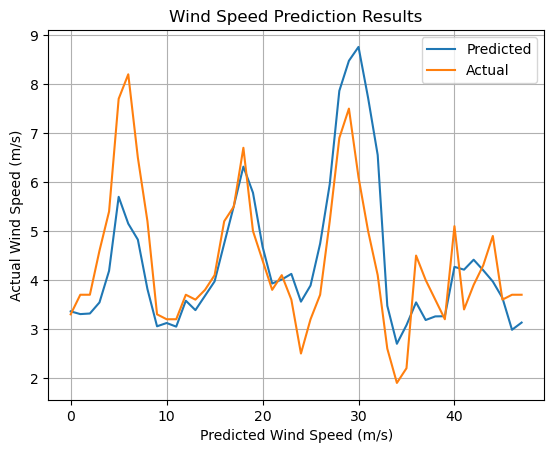

In [21]:
plt.plot(clf_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Predicted Wind Speed (m/s)')
plt.ylabel('Actual Wind Speed (m/s)')
plt.title('Wind Speed Prediction Results')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [24]:
#XGBoost
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=30)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
r2_score = model.score(X_test, y_test)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_score)

Mean Absolute Error: 0.9442252973715464
Root Mean Squared Error: 1.3062891305259363
R-squared: 0.12336463067621994


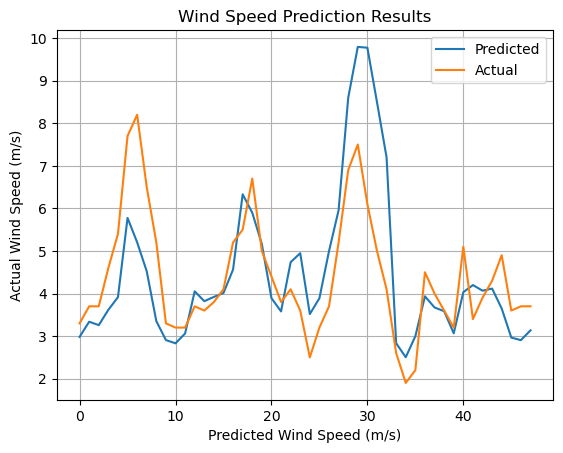

In [25]:
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Predicted Wind Speed (m/s)')
plt.ylabel('Actual Wind Speed (m/s)')
plt.title('Wind Speed Prediction Results')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture (can be further customized)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 units and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    layers.Dense(1)  # Output layer with 1 unit for wind speed prediction
])

# Compile the model (optimizer, loss function, metrics)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

C:\Users\Gangadi rajy reddy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate model performance (use the same metrics as for XGBoost)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
r2_score = model.evaluate(X_test, y_test)[1]  # Assuming R² is the second metric returned by evaluate

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_score)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 76.3918 - mae: 6.8081 - mse: 76.3918 - val_loss: 20.7156 - val_mae: 3.9487 - val_mse: 20.7156
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.0682 - mae: 2.7327 - mse: 11.0682 - val_loss: 2.4471 - val_mae: 1.3465 - val_mse: 2.4471
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0031 - mae: 1.8479 - mse: 5.0031 - val_loss: 5.8803 - val_mae: 2.1514 - val_mse: 5.8803
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1842 - mae: 1.8367 - mse: 5.1842 - val_loss: 3.0895 - val_mae: 1.5771 - val_mse: 3.0895
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5667 - mae: 1.5304 - mse: 3.5667 - val_loss: 2.7633 - val_mae: 1.3889 - val_mse: 2.7633
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0497 - mae: 1.3607 - mse: 3.0497 - val_loss: 4.0035 - val_mae: 1.5883 - val_mse: 4.0035
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2178 - mae: 1.5717 - mse: 4.2178 - val_l

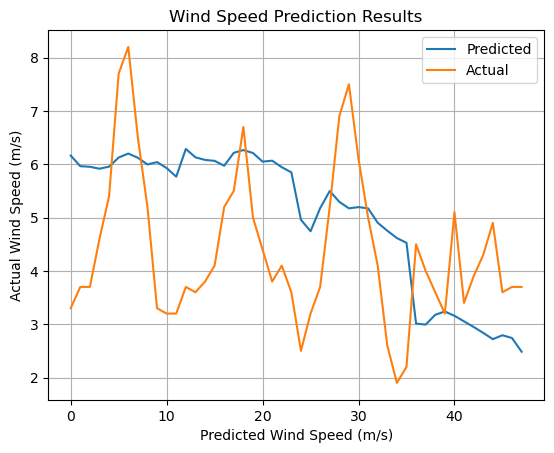

In [30]:
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Predicted Wind Speed (m/s)')
plt.ylabel('Actual Wind Speed (m/s)')
plt.title('Wind Speed Prediction Results')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [31]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
# Identify the timestep (adjust based on your data representation)
timestep = 1  # Assuming daily wind speed data (change if applicable)

# Reshape the data to include the timestep dimension
X_train_scaled_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timestep, X_train_scaled.shape[1])
X_test_scaled_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timestep, X_test_scaled.shape[1])

# Create the LSTM model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(timestep, X_train_scaled.shape[1])))  # Adjusted input_shape
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\Gangadi rajy reddy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(X_train_scaled_reshaped, y_train, epochs=100, validation_data=(X_test_scaled_reshaped, y_test), callbacks=[early_stopping])

# Make predictions on normalized test data
y_pred_scaled = model.predict(X_test_scaled_reshaped)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 664ms/step - loss: 22.3825 - val_loss: 19.5159
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.8262 - val_loss: 15.5771
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.2321 - val_loss: 8.0147
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4040 - val_loss: 2.7749
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6421 - val_loss: 2.2946
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2489 - val_loss: 2.0528
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.3929 - val_loss: 1.9246
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.5941 - val_loss: 1.7825
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6064 - val_loss: 1.7055
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0331 - val_loss: 1.6519
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6093 - val_loss: 1.6108
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13

In [35]:
y_pred = y_pred_scaled.reshape(48)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2 score : ",model.evaluate(X_test_scaled_reshaped,y_test))

Mean Squared Error: 1.1191780061626426
Mean Absolute Error: 0.8530393769343695
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.1529 
r2 score :  1.119178056716919


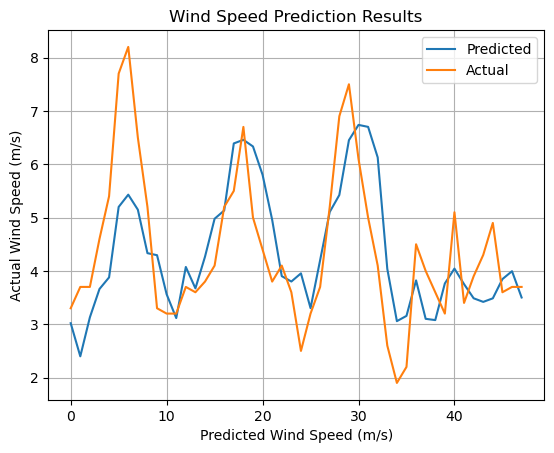

In [37]:
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Predicted Wind Speed (m/s)')
plt.ylabel('Actual Wind Speed (m/s)')
plt.title('Wind Speed Prediction Results')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [38]:
import tkinter as tk
from tkinter import ttk

In [49]:
# Create the main window
root = tk.Tk()
root.title("Wind speed prediction")
main_frame = ttk.Frame(root, padding="20")
main_frame.grid(row=0, column=0, sticky="nsew")
labels = ['Month', 'Latitude', 'Longitude', 'air_temperature', 'relative_humidity', 
          'daily_solar_radiation_horizontal', 'atmospheric_pressure', 'earth_temperature', 'Elevation']
entries = {}
for i, label in enumerate(labels):
    ttk.Label(main_frame, text=label).grid(row=i, column=0, sticky="w")
    entries[label] = ttk.Entry(main_frame)
    entries[label].grid(row=i, column=1, sticky="ew")
def display_prediction():
    input_values = [float(entries[label].get()) for label in labels]
    input_df = pd.DataFrame([input_values], columns=labels)
    input_scaled = scaler.transform(input_df)
    svm_pred = clf.predict(input_scaled)
    svm_label.config(text=f"SVM Prediction: {svm_pred}")
predict_button = ttk.Button(main_frame, text="Predict", command=display_prediction)
predict_button.grid(row=len(labels)+1, columnspan=2, pady=10)
svm_label = ttk.Label(main_frame, text="")
svm_label.grid(row=len(labels)+2, columnspan=2, pady=5)
rf_label = ttk.Label(main_frame, text="")
rf_label.grid(row=len(labels)+3, columnspan=2, pady=5)
# Information Text
info_text = tk.StringVar()
info_label = ttk.Label(main_frame, textvariable=info_text, wraplength=500)
info_label.grid(row=20, columnspan=2)
root.mainloop()

''